In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import math

In [2]:
# Loading Body Classifier
body_classifier = cv2.CascadeClassifier('xml/haarcascade_fullbody.xml')

In [3]:
img_path = "test_images/people.jpg"

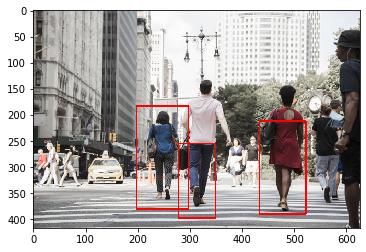

In [4]:
def detect_person(img_path):
    img = plt.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bodies = body_classifier.detectMultiScale(gray, 1.1, 3)
    #print(bodies)
    for (x,y,w,h) in bodies:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            #cv2.imshow('Humans', img)
            #cv2.waitKey()
            #cv2.destroyAllWindows()
    plt.imshow(img)
    return bodies
    
bodies = detect_person(img_path)

In [5]:
bodies

array([[433, 212,  89, 178],
       [198, 183,  99, 197],
       [278, 255,  71, 142]], dtype=int32)

In [6]:
def calc_distance(x1, y1, x2, y2):
    return round(math.sqrt((x2-x1)**2 + (y2-y1)**2))

In [7]:
def calc_centre(x, y, w, h):
    '''
    formula: centre = x + w/2, y + h/2
    '''
    return x + w//2, y + h//2

In [8]:
bodies

array([[433, 212,  89, 178],
       [198, 183,  99, 197],
       [278, 255,  71, 142]], dtype=int32)

In [9]:
for body in bodies:
    x, y, w, h = body
    centre_x, centre_y = calc_centre(x, y, w, h)
    print(centre_x, centre_y)

477 301
247 281
313 326


231


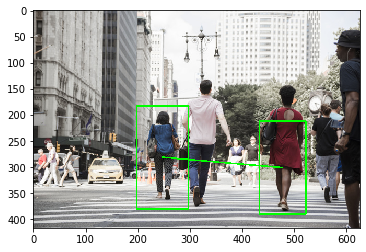

In [10]:
color = (0, 0, 255)
img_copy = plt.imread(img_path)
x1,y1,w1,h1 = [433, 212,  89, 178]
x2,y2,w2,h2 = [198, 183,  99, 197]
centre_x1, centre_y1 = calc_centre(x1, y1, w1, h1)
centre_x2, centre_y2 = calc_centre(x2, y2, w2, h2)
distance = calc_distance(centre_x1, centre_y1, centre_x2, centre_y2)
if distance >= 60:
    color = (0, 255, 0)
cv2.rectangle(img_copy, (x1, y1), (x1+w1, y1+h1), color, 2)
cv2.rectangle(img_copy, (x2, y2), (x2+w2, y2+h2), color, 2)
#cv2.putText(img_copy,"!", (centre_x1, centre_y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0))
#cv2.putText(img_copy,"!", (centre_x2, centre_y2), cv2.FONT_HERSHEY_SIMPLEX, 1, color)
cv2.line(img_copy, (centre_x1, centre_y1), (centre_x2, centre_y2), color, 2)
print(distance)
plt.imshow(img_copy)

In [11]:
a = np.array(['d1', 'd2', 'd3'])
for i in a:
    for j in a:
        if i != j:
            print("{}, {}".format(i, j))

d1, d2
d1, d3
d2, d1
d2, d3
d3, d1
d3, d2


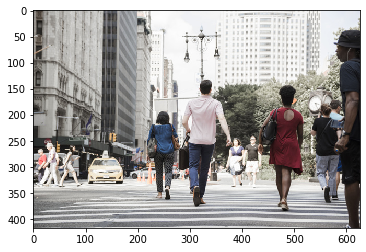

In [12]:
my_img = plt.imread(img_path)
plt.imshow(my_img)

[433 212  89 178] [198 183  99 197] 236 safe
[433 212  89 178] [278 255  71 142] 143 safe
[198 183  99 197] [433 212  89 178] 241 safe
[198 183  99 197] [278 255  71 142] 104 safe
[278 255  71 142] [433 212  89 178] 162 safe
[278 255  71 142] [198 183  99 197] 92 safe


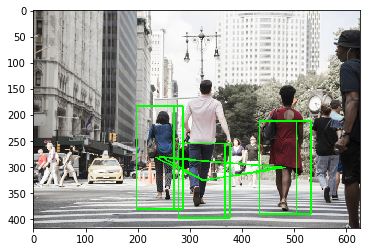

In [15]:
color = (0, 0, 255)
for i in bodies:
    for j in bodies:
        comparison = i == j
        if(comparison.all()):
            pass
        else:
            x1, y1, w1, h1 = i
            x2, y2, w1, h2 = j
            centre_x1, centre_y1 = calc_centre(x1, y1, w1, h1)
            centre_x2, centre_y2 = calc_centre(x2, y2, w2, h2)
            distance = calc_distance(centre_x1, centre_y1, centre_x2, centre_y2)
            if distance >= 60: # is safe
                color = (0, 255, 0)
            else:
                color = (255, 0, 0)
            cv2.line(my_img, (centre_x1, centre_y1), (centre_x2, centre_y2), color, 2)
            cv2.rectangle(my_img, (x1, y1), (x1+w1, y1+h1), color, 2)
            print(i, j, distance,'safe' if distance >= 60 else 'unsafe')
            plt.imshow(my_img)
cv2.imwrite("haarcascade_detected.jpg", my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
one = [1, 2, 3, 3]

list(set(one))

[1, 2, 3]